# Importing Neccessary Libraries

### Written by Nafisa Anjum

# Myers-Briggs Type Indicator (MBTI)

The Myers-Briggs Type Indicator (MBTI) is a popular personality assessment tool based on Carl Jung’s theory of psychological types. It categorizes individuals into one of 16 distinct personality types based on their preferences in four dichotomies:

1. **Introversion (I) vs. Extraversion (E)**
   - **Introverts (I)**: Energized by solitary activities, require time alone to recharge.
   - **Extraverts (E)**: Energized by interactions with others, seek out social engagement.


2. **Sensing (S) vs. Intuition (N)**
   - **Sensors (S)**: Focus on concrete, tangible details and present realities.
   - **Intuitives (N)**: Interested in abstract concepts and future possibilities.
   

3. **Thinking (T) vs. Feeling (F)**
   - **Thinkers (T)**: Prioritize logic and objective criteria in decision-making.
   - **Feelers (F)**: Base decisions on personal values and how they affect others.
   

4. **Judging (J) vs. Perceiving (P)**
   - **Judgers (J)**: Prefer structure, order, and decisiveness.
   - **Perceivers (P)**: More adaptable, spontaneous, and open to new information.

## Personality Types

Combining these preferences results in 16 distinct personality types:

1. **ISTJ (Introverted, Sensing, Thinking, Judging)**: The Inspector - Responsible, organized, and practical.

2. **ISFJ (Introverted, Sensing, Feeling, Judging)**: The Protector - Compassionate, detail-oriented, and loyal.

3. **INFJ (Introverted, Intuition, Feeling, Judging)**: The Advocate - Idealistic, insightful, and principled.

4. **INTJ (Introverted, Intuition, Thinking, Judging)**: The Architect - Strategic, analytical, and independent.

5. **ISTP (Introverted, Sensing, Thinking, Perceiving)**: The Virtuoso - Adventurous, logical, and hands-on.

6. **ISFP (Introverted, Sensing, Feeling, Perceiving)**: The Composer - Artistic, gentle, and spontaneous.

7. **INFP (Introverted, Intuition, Feeling, Perceiving)**: The Mediator - Creative, empathetic, and idealistic.

8. **INTP (Introverted, Intuition, Thinking, Perceiving)**: The Logician - Curious, analytical, and independent.

9. **ESTP (Extraverted, Sensing, Thinking, Perceiving)**: The Entrepreneur - Energetic, pragmatic, and action-oriented.

10. **ESFP (Extraverted, Sensing, Feeling, Perceiving)**: The Entertainer - Sociable, lively, and spontaneous.

11. **ENFP (Extraverted, Intuition, Feeling, Perceiving)**: The Campaigner - Enthusiastic, imaginative, and sociable.

12. **ENTP (Extraverted, Intuition, Thinking, Perceiving)**: The Debater - Innovative, energetic, and intellectually curious.

13. **ESTJ (Extraverted, Sensing, Thinking, Judging)**: The Executive - Organized, assertive, and pragmatic.

14. **ESFJ (Extraverted, Sensing, Feeling, Judging)**: The Consul - Caring, social, and organized.

15. **ENFJ (Extraverted, Intuition, Feeling, Judging)**: The Protagonist - Charismatic, empathetic, and organized.

16. **ENTJ (Extraverted, Intuition, Thinking, Judging)**: The Commander - Confident, strategic, and decisive.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings(action = 'ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from sklearn.preprocessing import LabelEncoder, MinMaxScaler


from IPython.core.display import display, HTML

# Reading the Dataset

In [3]:
data = pd.read_csv('data/data.csv')

# Sanity check 

In [4]:
data.shape

(43744, 9)

In [5]:
# to get first five rows
data.head()

Age  Gender  Education  Introversion Score  Sensing Score  Thinking Score  \
0  21.0  Female          1             5.89208       2.144395         7.32363   
1  24.0  Female          1             2.48366       3.206188         8.06876   
2  26.0  Female          1             7.02910       6.469302         4.16472   
3  30.0    Male          0             5.46525       4.179244         2.82487   
4  31.0  Female          0             3.59804       6.189259         5.31347   

   Judging Score Interest Personality  
0       5.462224     Arts        ENTP  
1       3.765012  Unknown        INTP  
2       5.454442   Others        ESFP  
3       5.080477   Sports        ENFJ  
4       3.677984   Others        ISFP

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43744 entries, 0 to 43743
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 43744 non-null  float64
 1   Gender              43744 non-null  object 
 2   Education           43744 non-null  int64  
 3   Introversion Score  43744 non-null  float64
 4   Sensing Score       43744 non-null  float64
 5   Thinking Score      43744 non-null  float64
 6   Judging Score       43744 non-null  float64
 7   Interest            43744 non-null  object 
 8   Personality         43744 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 3.0+ MB


In [6]:
data.columns

Index(['Age', 'Gender', 'Education', 'Introversion Score', 'Sensing Score',
       'Thinking Score', 'Judging Score', 'Interest', 'Personality'],
      dtype='object')

In [8]:
data.isnull().sum()

Age                   0
Gender                0
Education             0
Introversion Score    0
Sensing Score         0
Thinking Score        0
Judging Score         0
Interest              0
Personality           0
dtype: int64

# Exploratory Data Analysis

In [7]:
# descriptive statistics
data.describe(include = 'number').T

count       mean       std       min        25%  \
Age                 43744.0  27.437203  4.893805  18.00000  24.000000   
Education           43744.0   0.229014  0.420203   0.00000   0.000000   
Introversion Score  43744.0   4.588349  2.902628   0.00015   2.067020   
Sensing Score       43744.0   5.780074  1.241648   0.00000   4.953340   
Thinking Score      43744.0   5.419131  2.900785   0.00032   2.895750   
Judging Score       43744.0   5.391041  1.442413   0.00000   4.511842   

                          50%        75%        max  
Age                 27.000000  30.000000  52.000000  
Education            0.000000   0.000000   1.000000  
Introversion Score   4.261680   7.085002   9.999920  
Sensing Score        6.162928   6.622978   9.803837  
Thinking Score       5.769870   7.923503   9.999770  
Judging Score        5.771635   6.409583  10.000000

In [31]:
from collections import Counter

def bar_labels(axes, rotation=0, location="edge"):
    for container in axes.containers:
        axes.bar_label(container, label_type=location, rotation=rotation)
    axes.set_yticklabels(())
    axes.set_xlabel("")
    axes.set_ylabel("")

In [33]:
cats = ["Gender", "Education", "Interest", "Personality"]
nums = [i for i in data.columns if i not in cats]

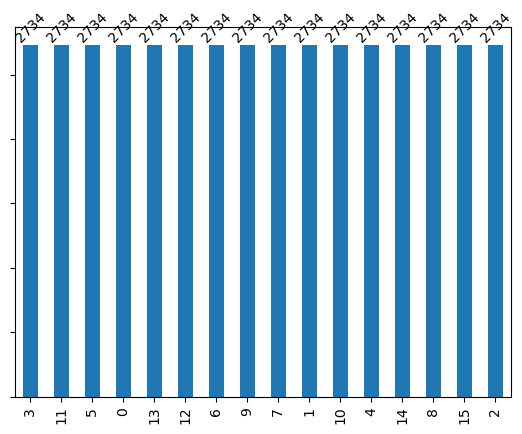

In [34]:
fig, axes = plt.subplots()
data[cats[-1]].value_counts().plot(kind="bar", ax=axes)
bar_labels(axes, 45)
plt.show()

# Age, Introversion Score, Thinking Score

In [15]:
fig_3d = px.scatter_3d(data, 
                       x = 'Age', 
                       y = 'Introversion Score', 
                       z = 'Thinking Score',
                       color = 'Gender', 
                       title = "3D Scatter Plot: Age vs Introversion vs Thinking")
fig_3d.show()

# Personality type for Judging Score

In [16]:
fig_personality_judging = px.box(data, 
                                 x = "Personality", 
                                 y = "Judging Score", 
                                 title = "Judging Score Distribution by Personality Type")
fig_personality_judging.show()

In [12]:
numerical_features = ['Introversion Score', 'Sensing Score', 'Thinking Score', 'Judging Score']

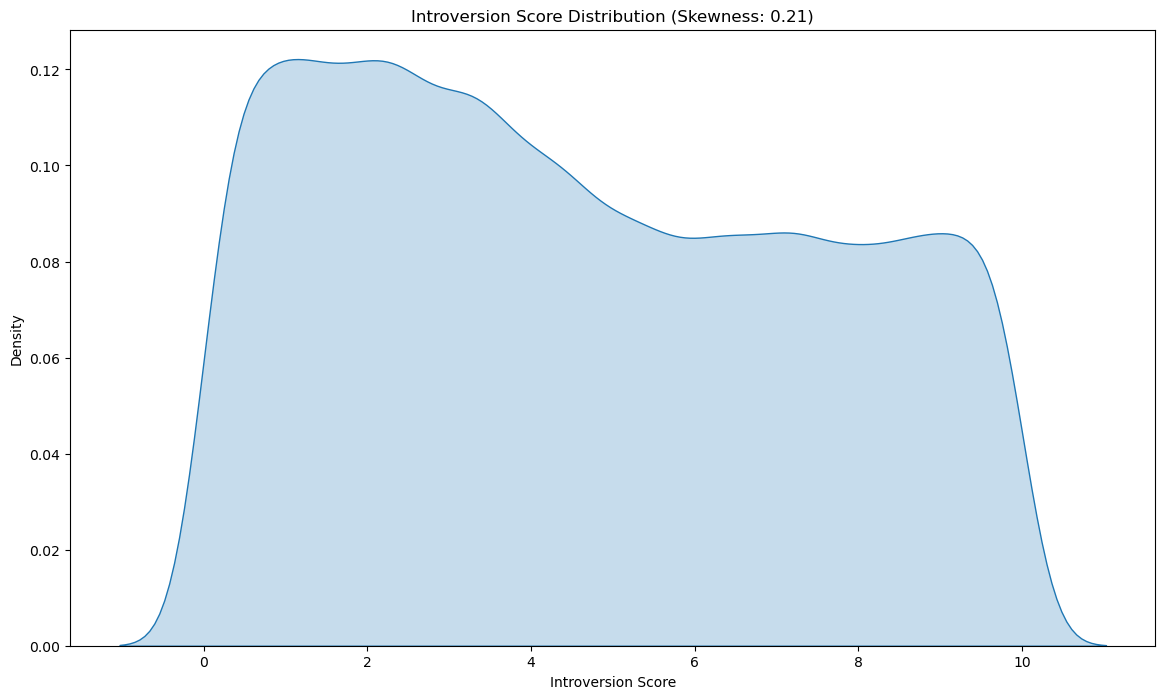

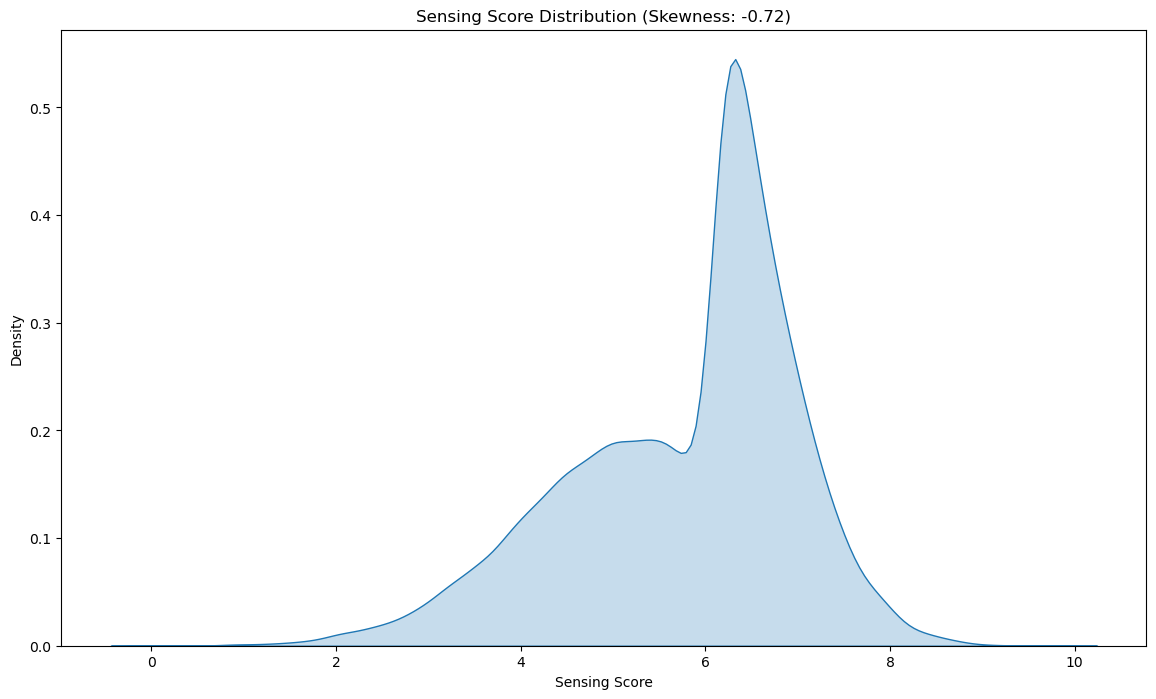

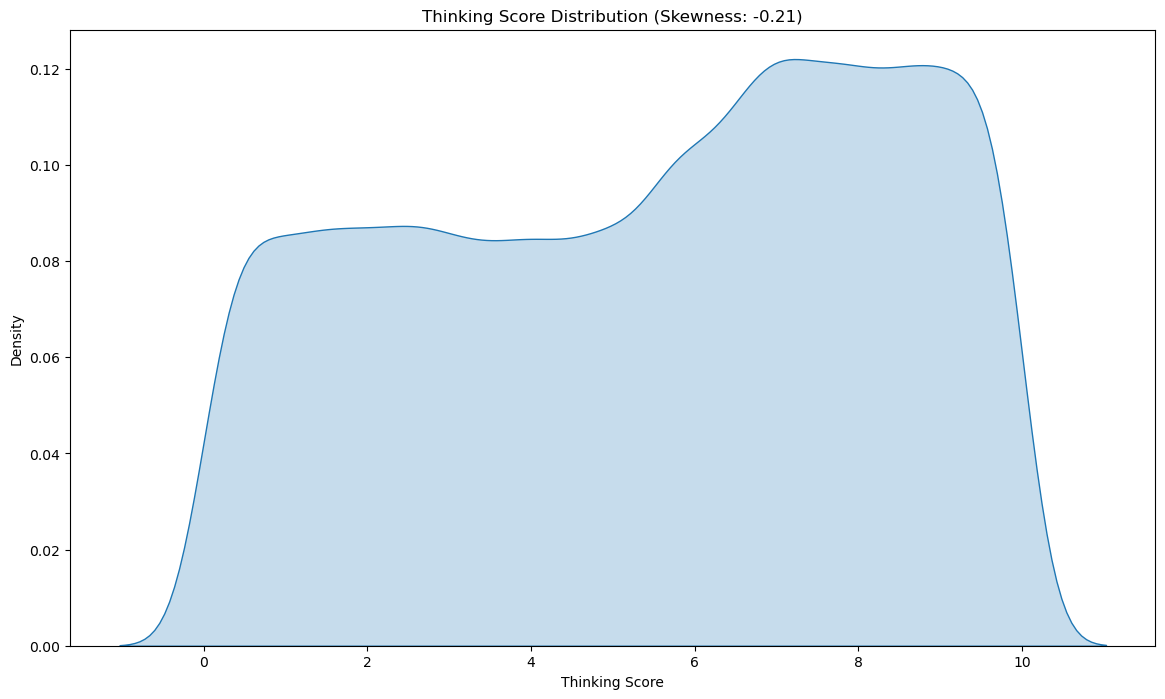

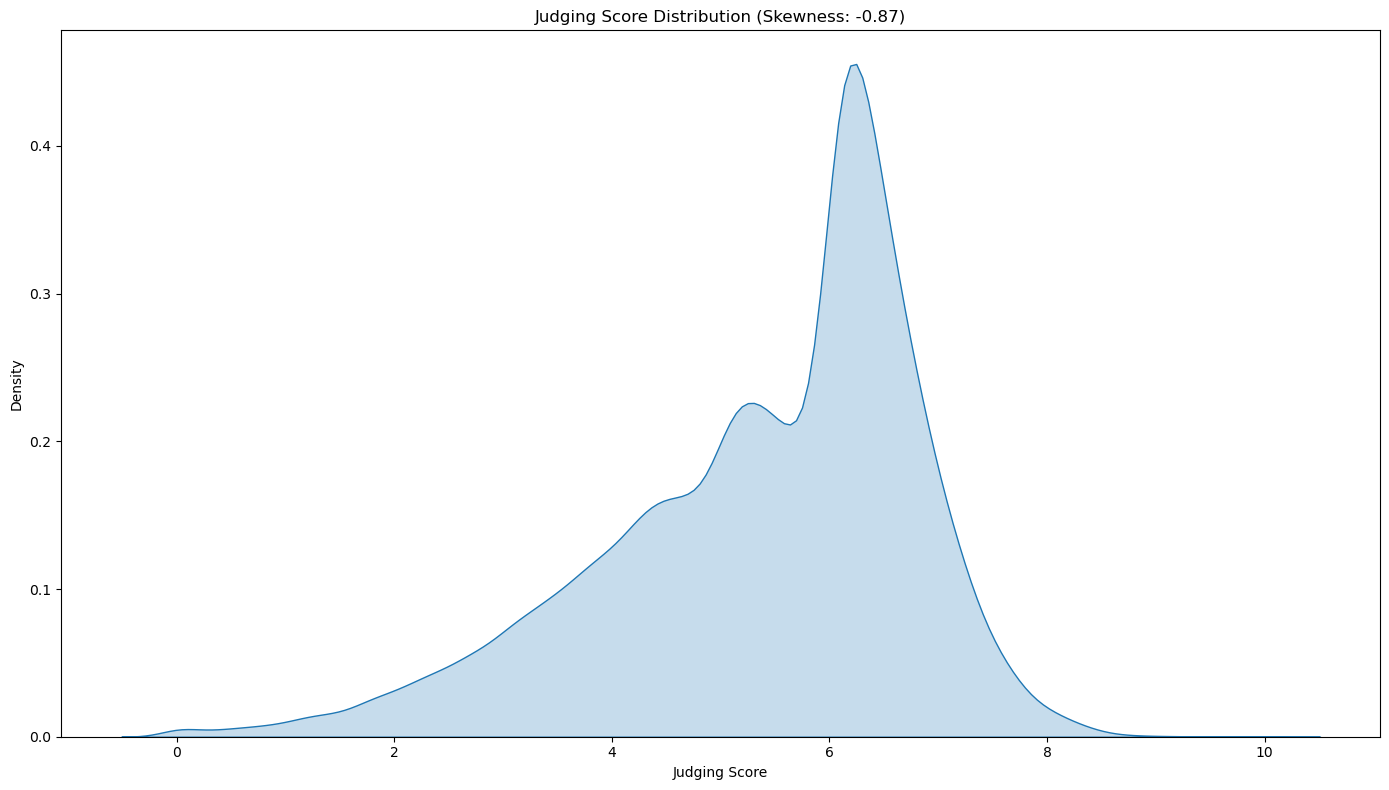

In [13]:
# KDE plot of the numerical features along with skewness
from scipy.stats import skew

for i, feature in enumerate(numerical_features, 1):
    plt.figure(figsize=(14,8))
    sns.kdeplot(data[feature], shade=True)
    plt.title(f'{feature} Distribution (Skewness: {skew(data[feature]):.2f})')
plt.tight_layout()
plt.show()

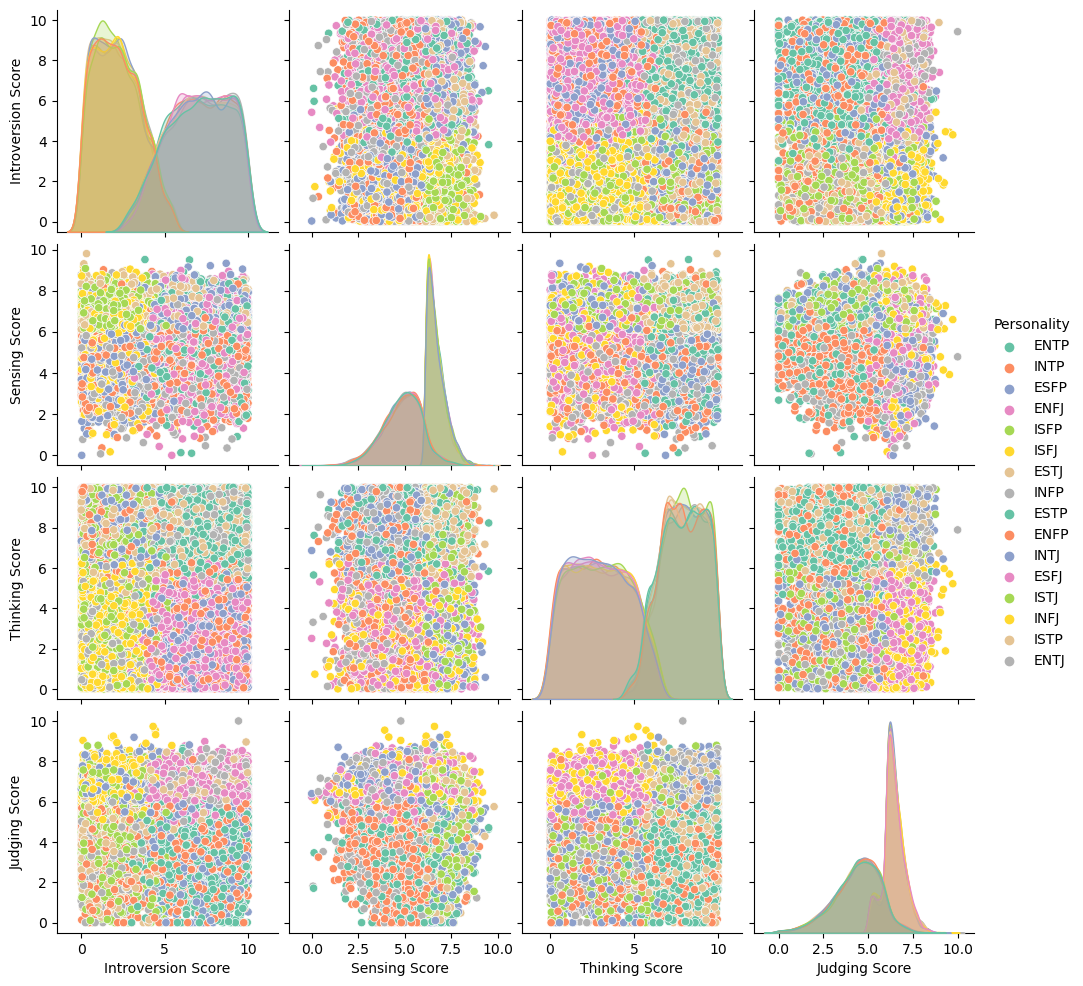

In [14]:
# 2. Pairplot between numerical features, colored by personality
sns.pairplot(data, hue='Personality', vars=numerical_features, diag_kind='kde', palette='Set2')
# plt.title('Pairplot of Numerical Features by Personality')
plt.show()

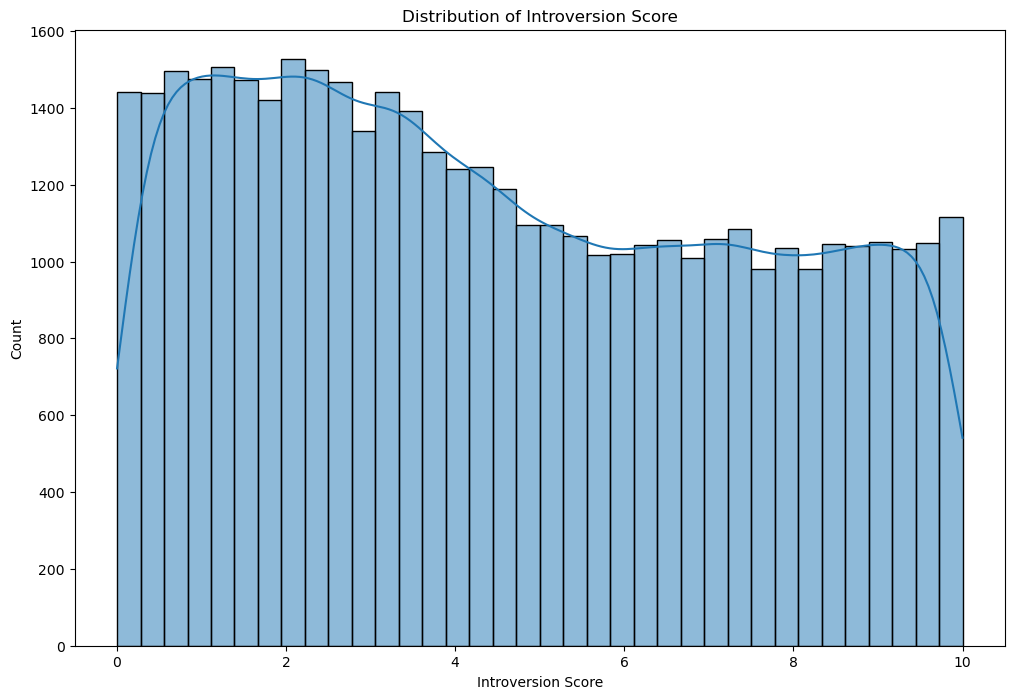

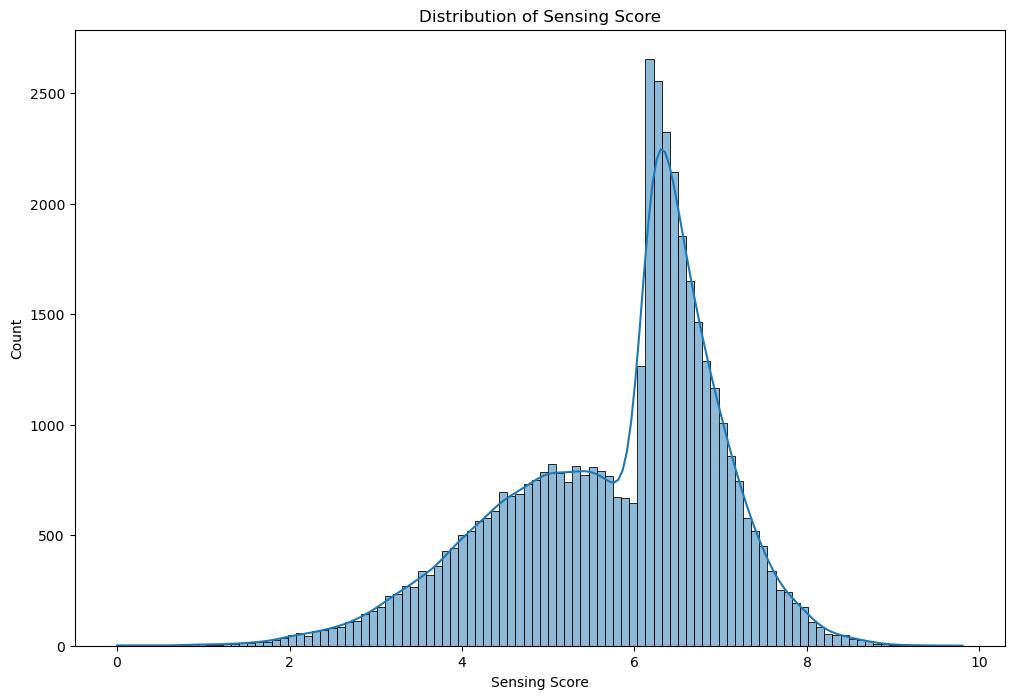

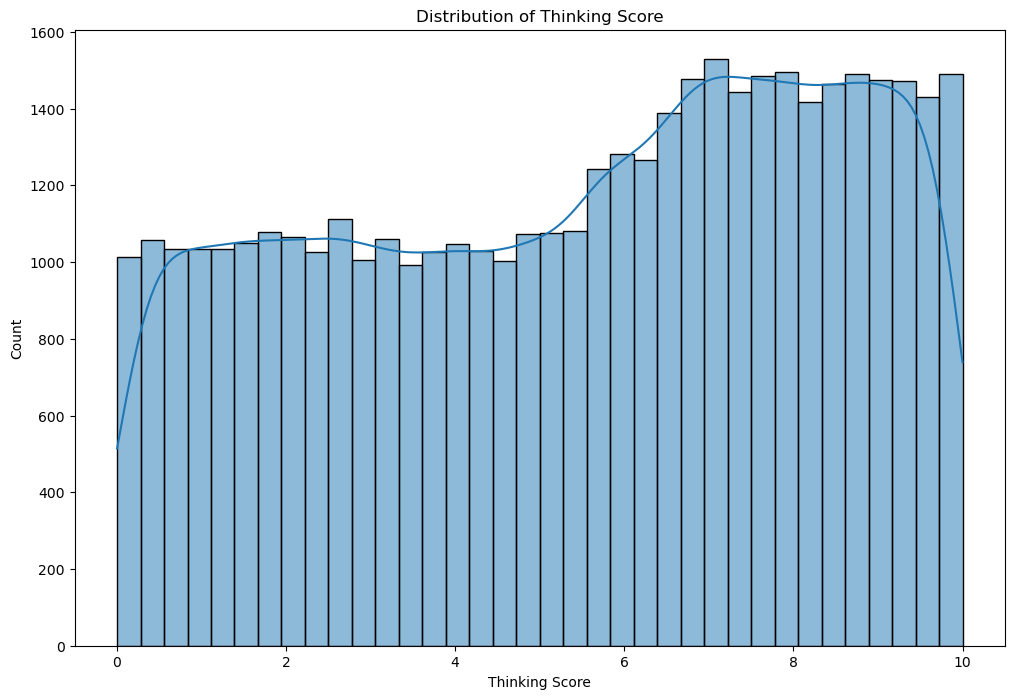

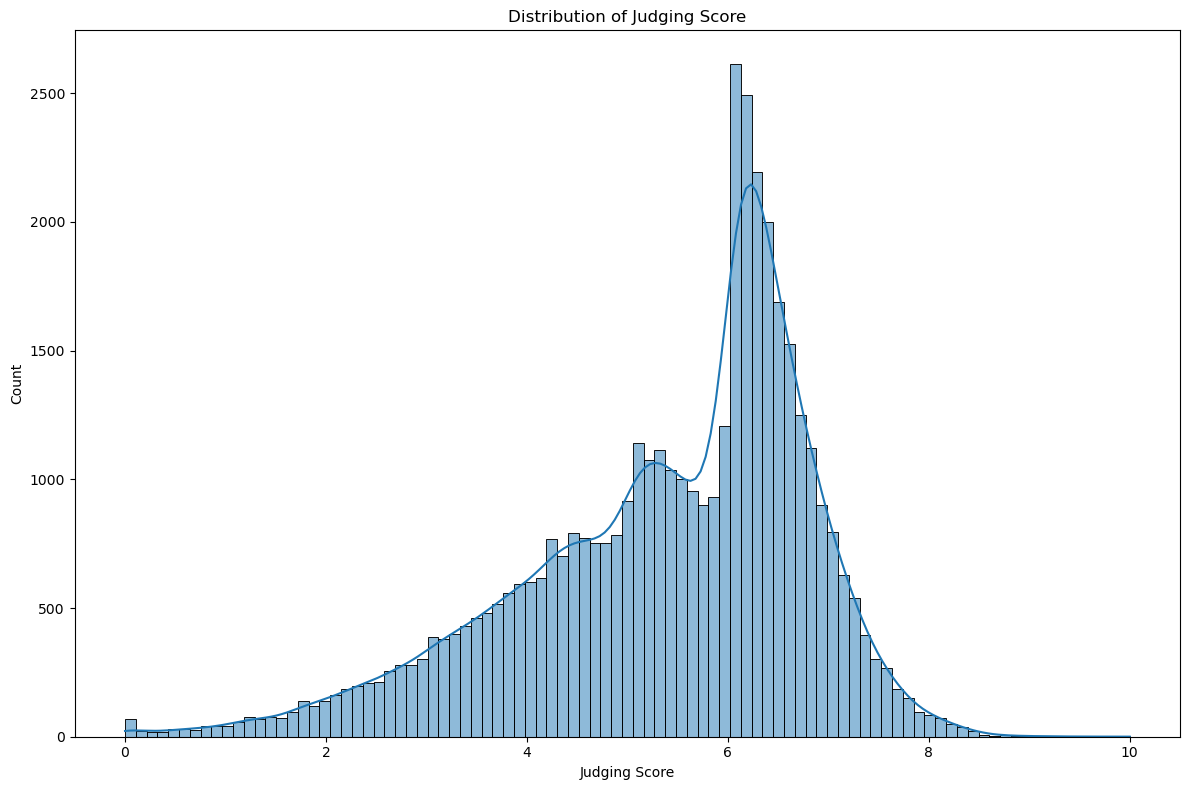

In [15]:
# Distribution of numerical features
for i, col in enumerate(numerical_features, 1):
    plt.figure(figsize=(12,8))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

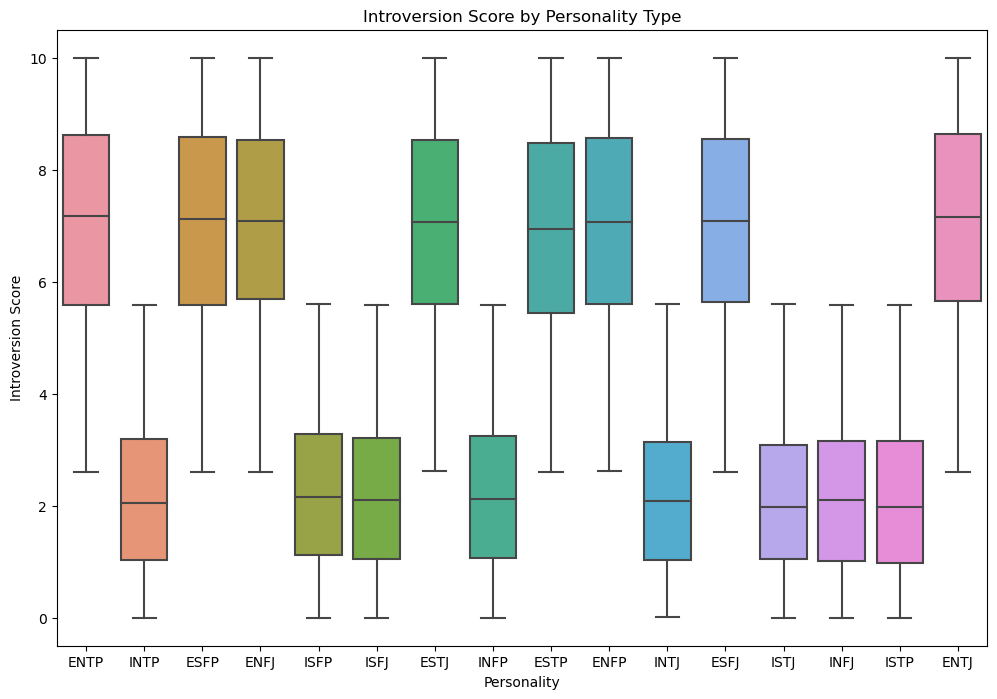

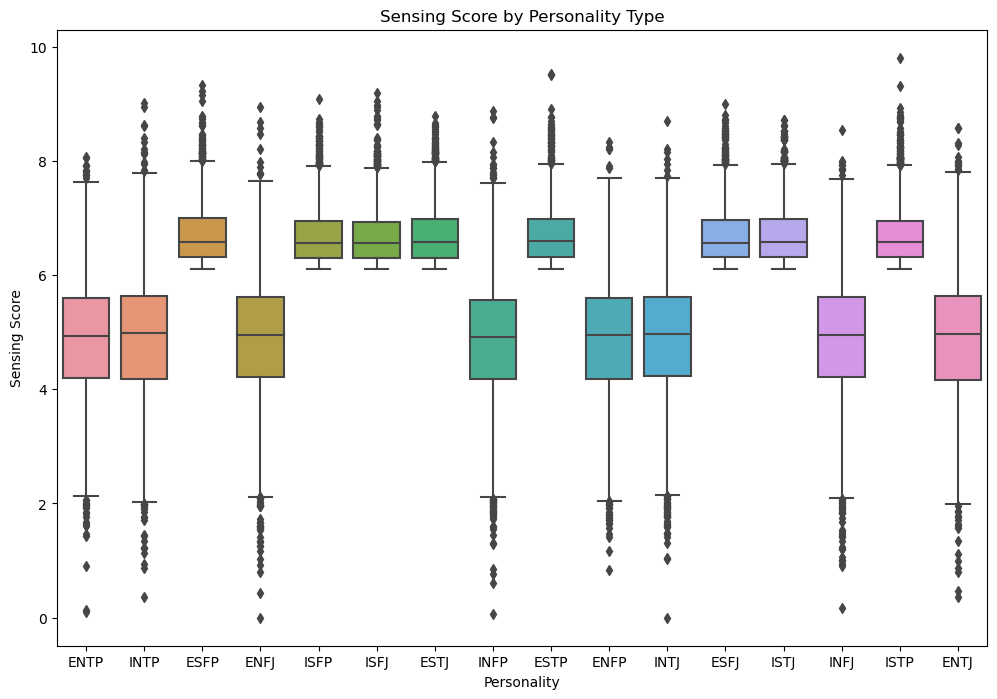

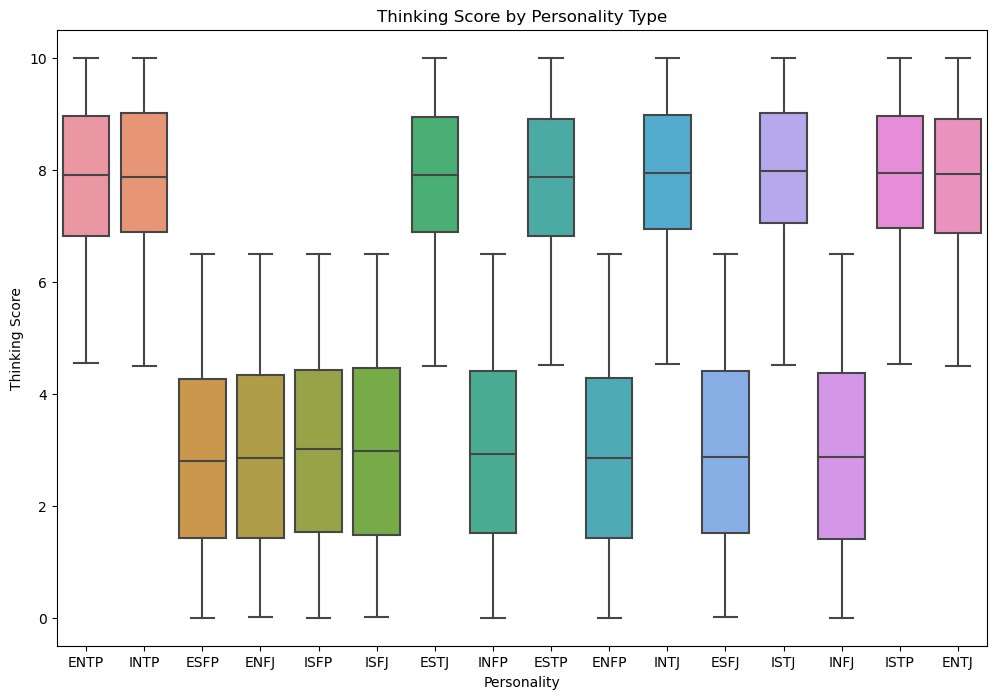

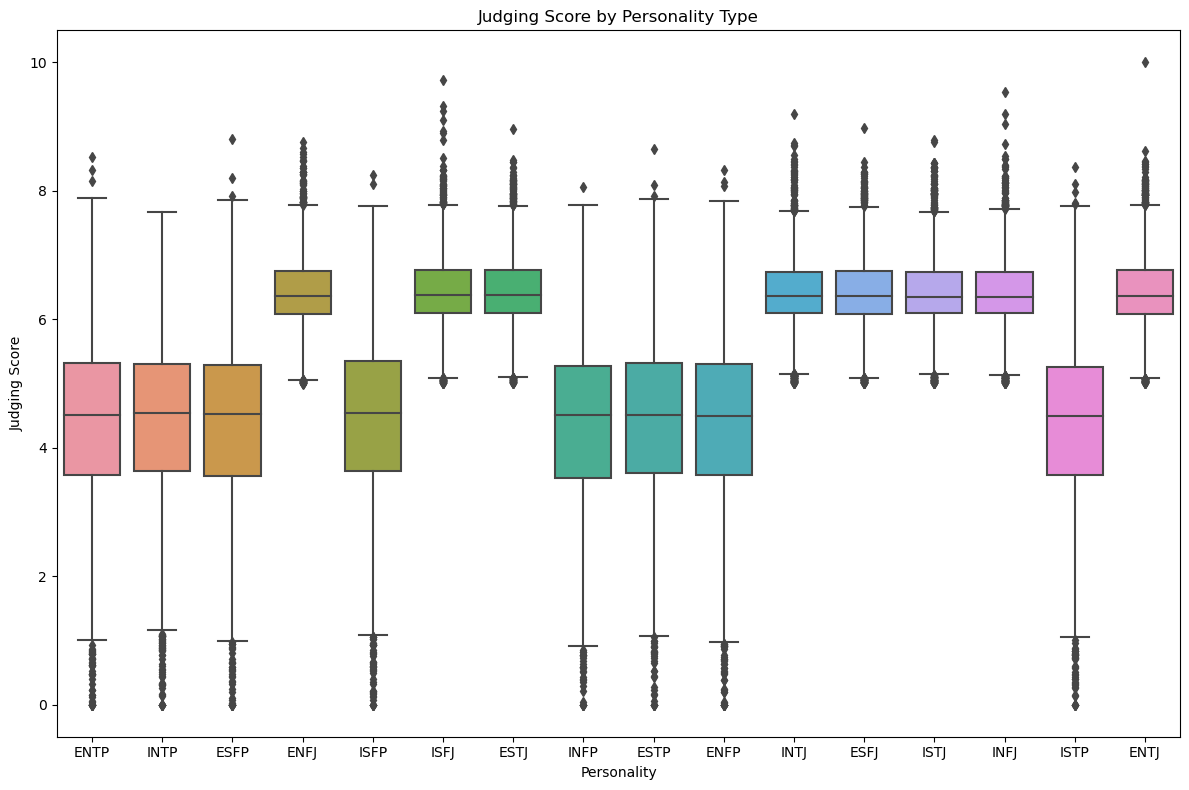

In [16]:
# Boxplots of numerical features by Personality
for i, col in enumerate(['Introversion Score', 'Sensing Score', 'Thinking Score', 'Judging Score'], 1):
    plt.figure(figsize=(12,8))
    sns.boxplot(x='Personality', y=col, data=data)
    plt.title(f'{col} by Personality Type')
plt.tight_layout()
plt.show()

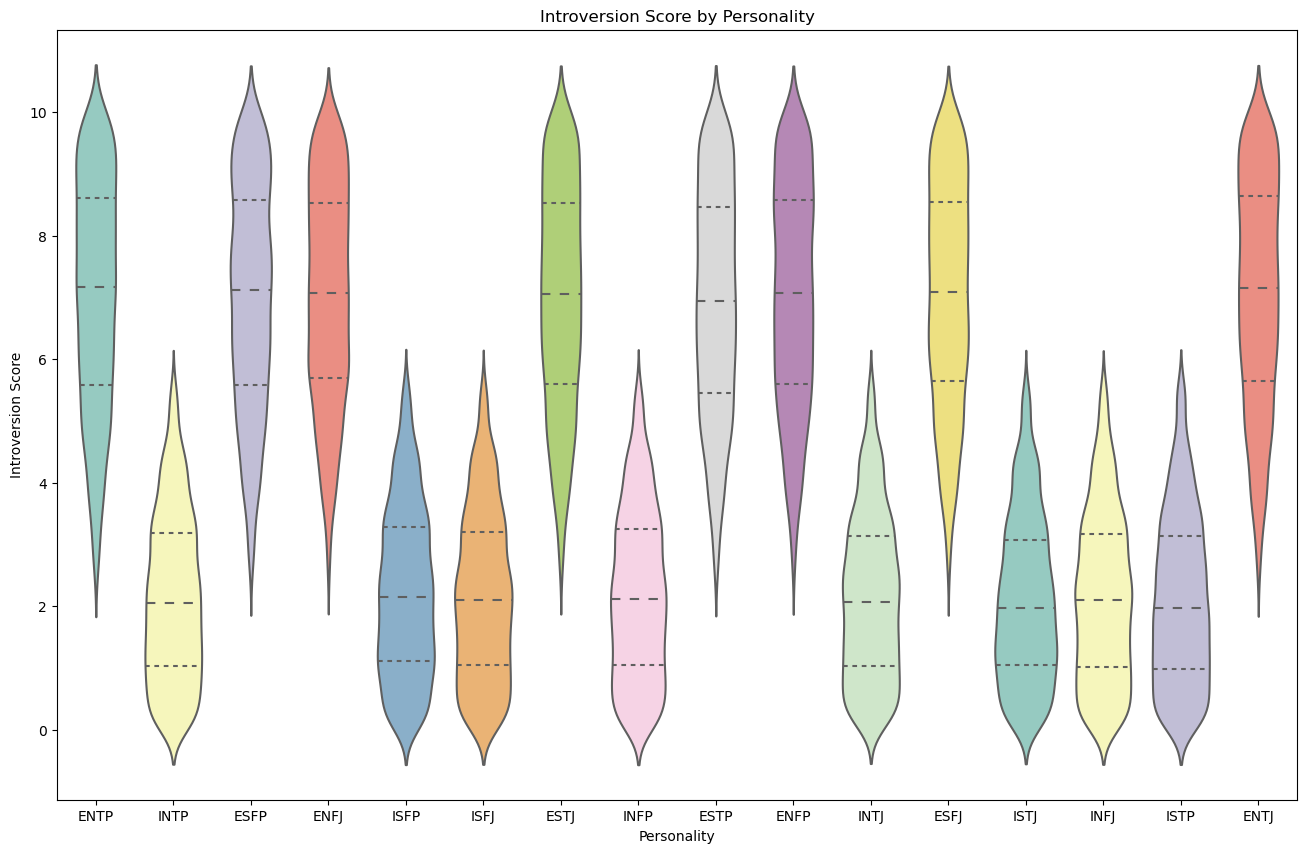

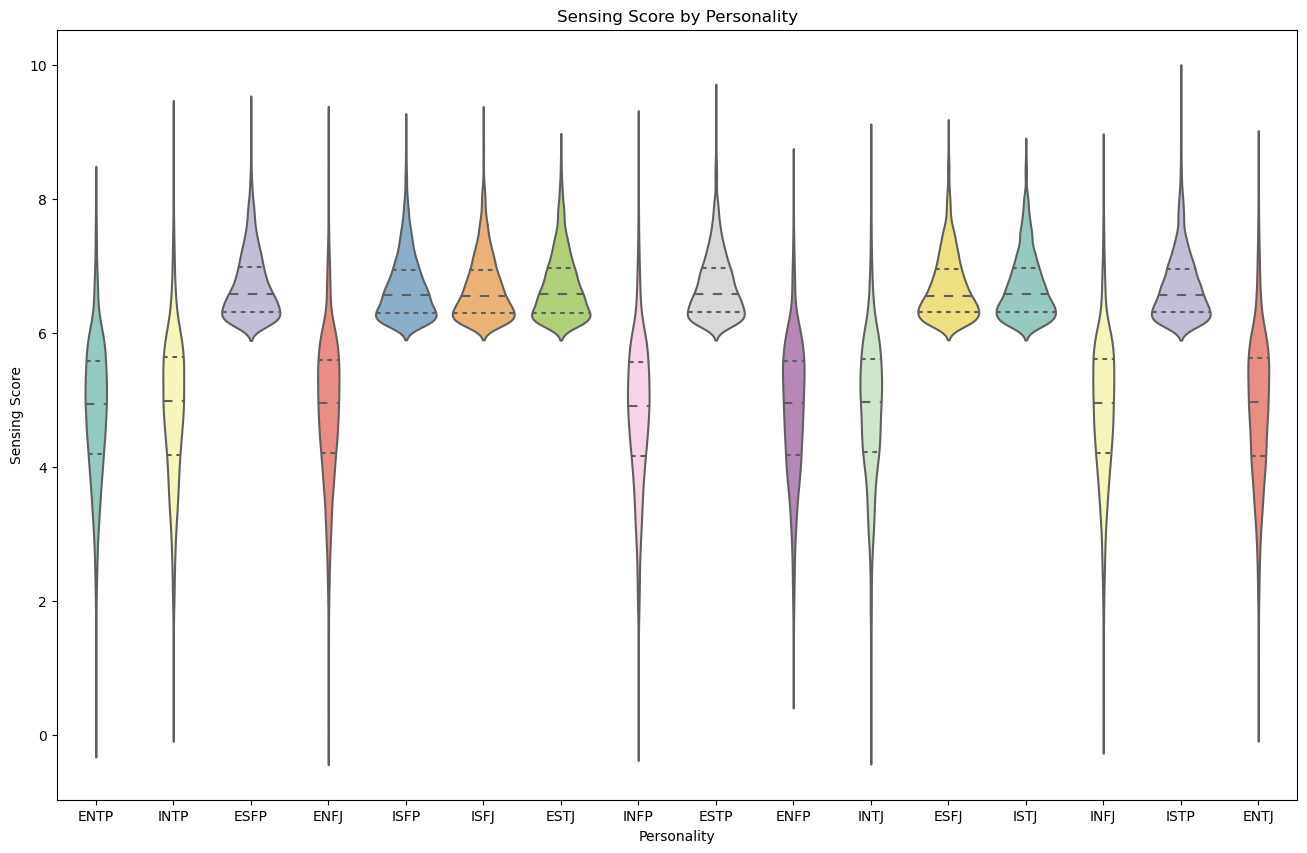

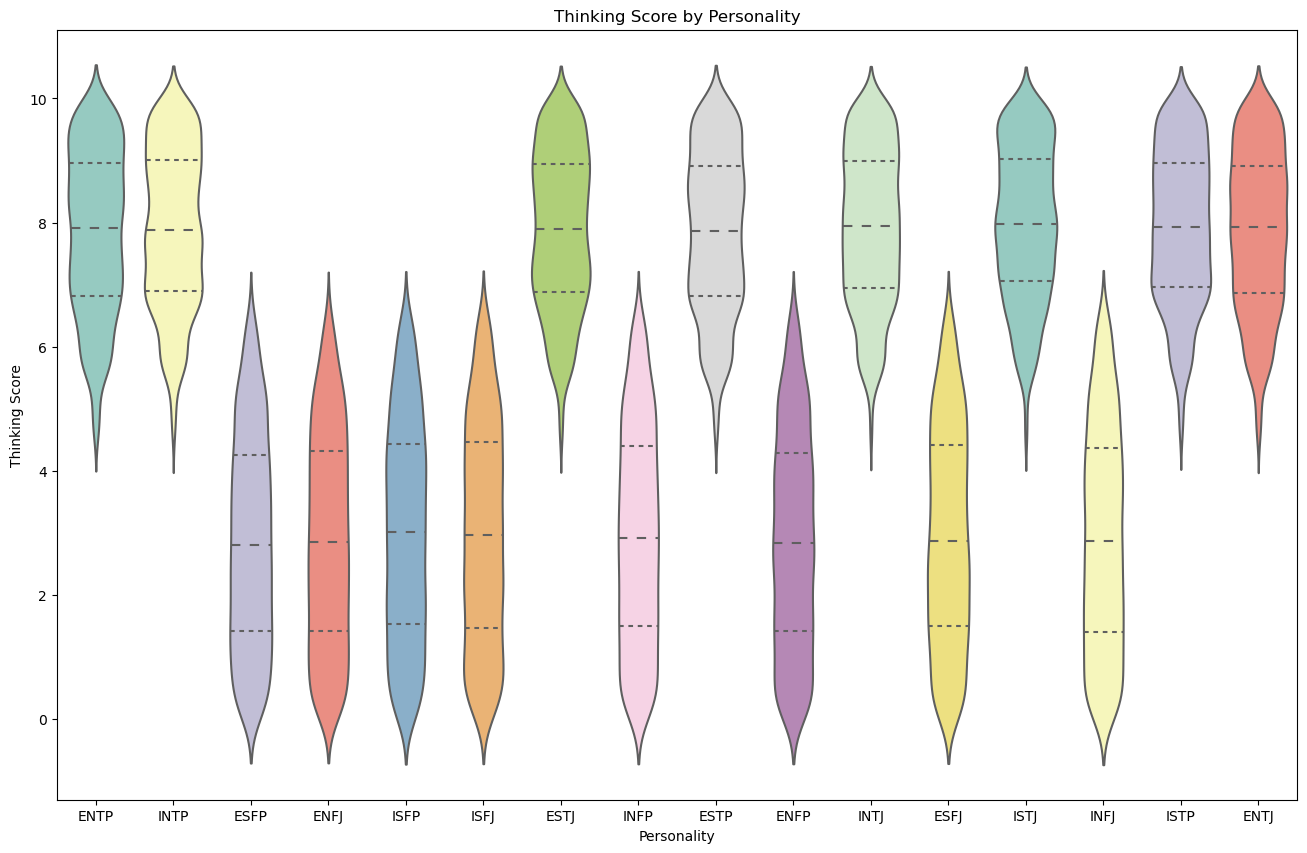

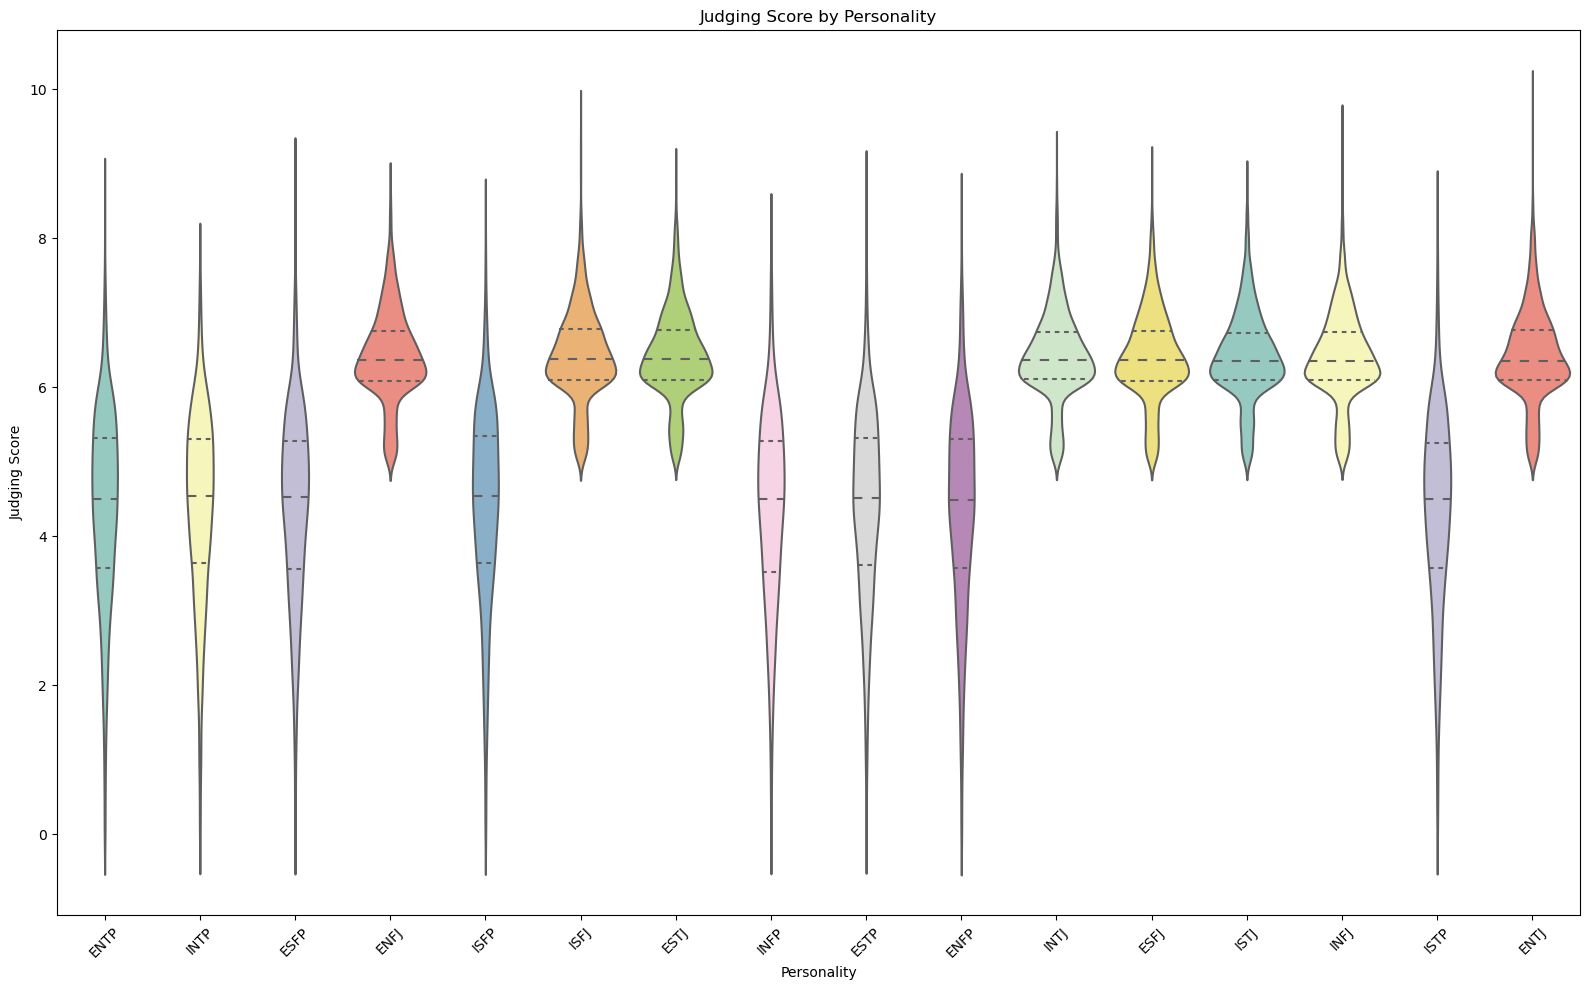

In [17]:
# Violin plot for numerical features by Personality
for i, feature in enumerate(numerical_features, 1):
    plt.figure(figsize=(16,10))
    sns.violinplot(x='Personality', y=feature, data=data, inner='quartile', palette='Set3')
    plt.title(f'{feature} by Personality')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

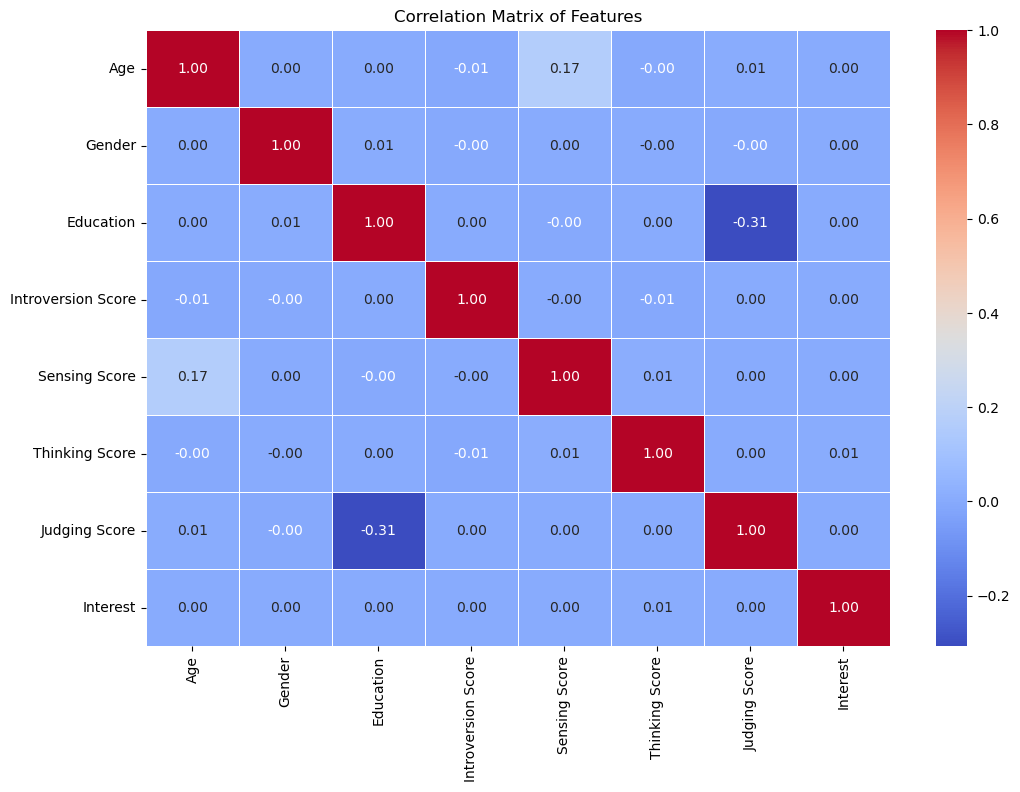

In [18]:
# Encode categorical variables (Gender, Interest, Education, Personality)
label_encoders = {}
for column in ['Gender', 'Interest', 'Education', 'Personality']:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])
    
plt.figure(figsize=(12, 8))
sns.heatmap(data.drop(columns=['Personality']).corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

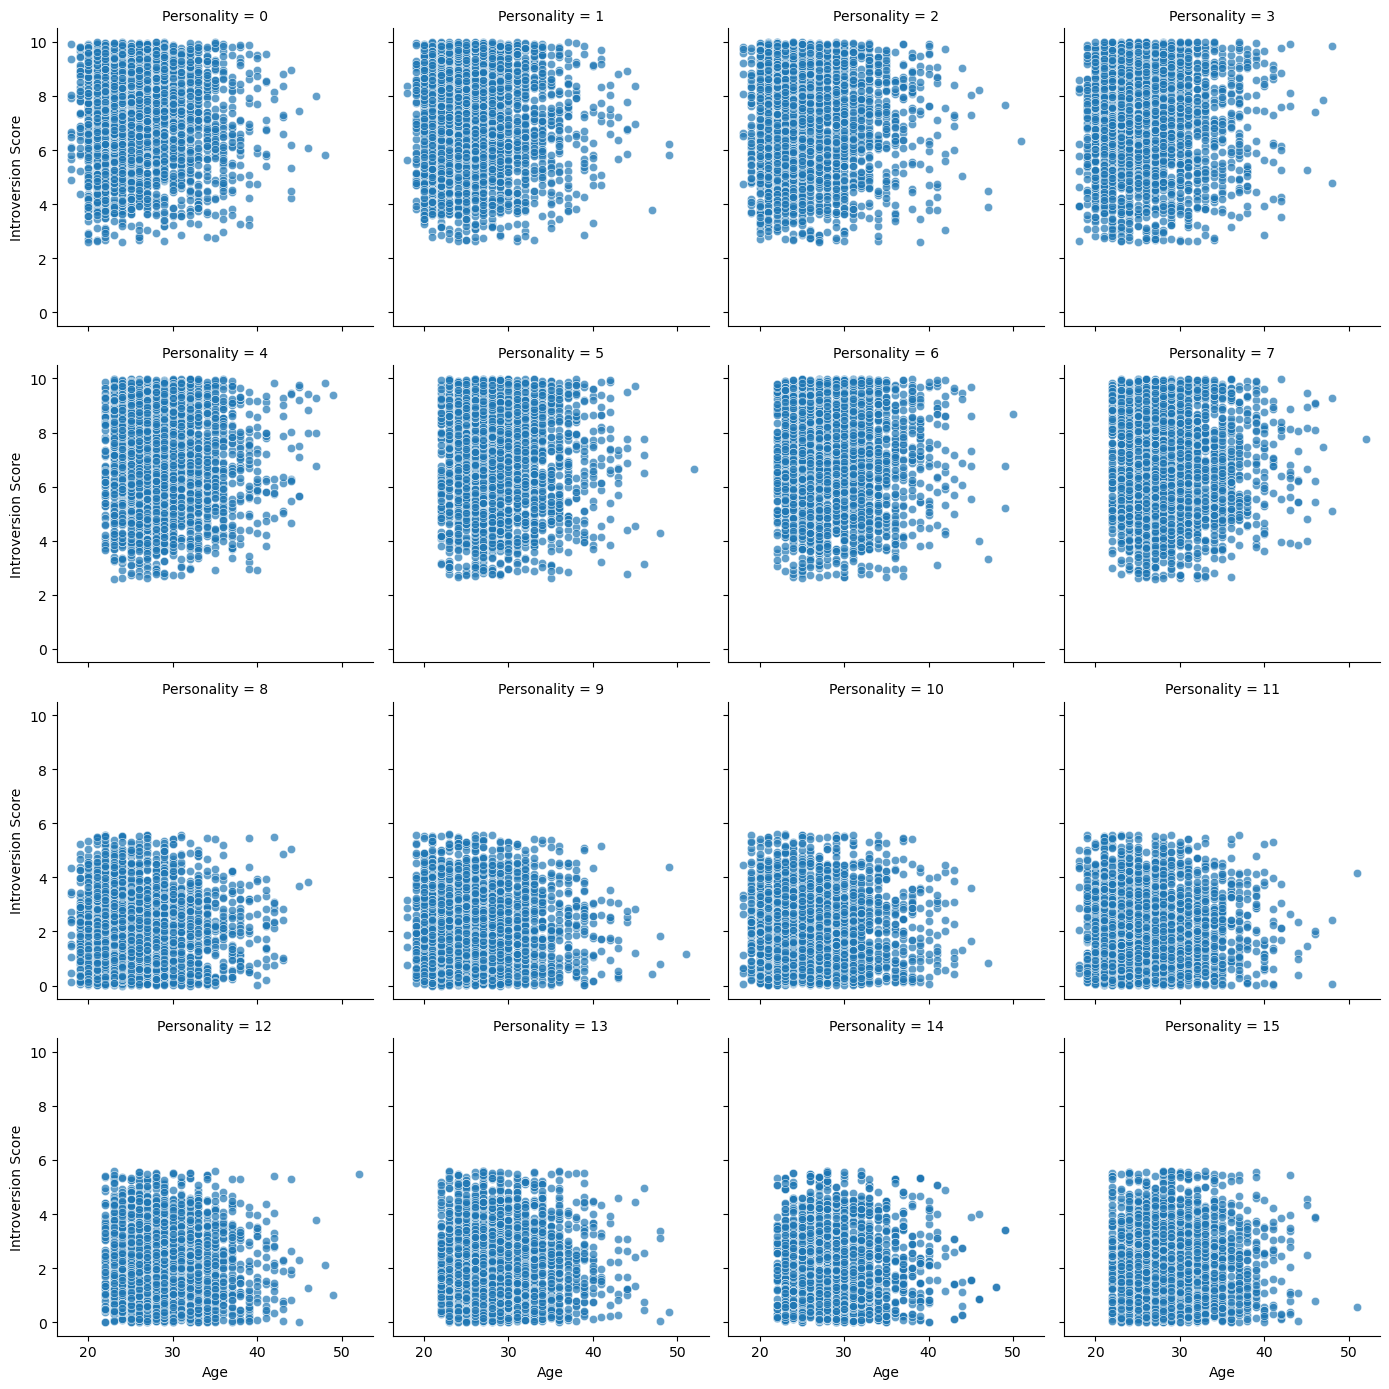

In [19]:
# FacetGrid: Age vs each score by Personality
g = sns.FacetGrid(data, col="Personality", col_wrap=4, height=3.5)
g.map(sns.scatterplot, 'Age', 'Introversion Score', alpha=0.7)
plt.show()

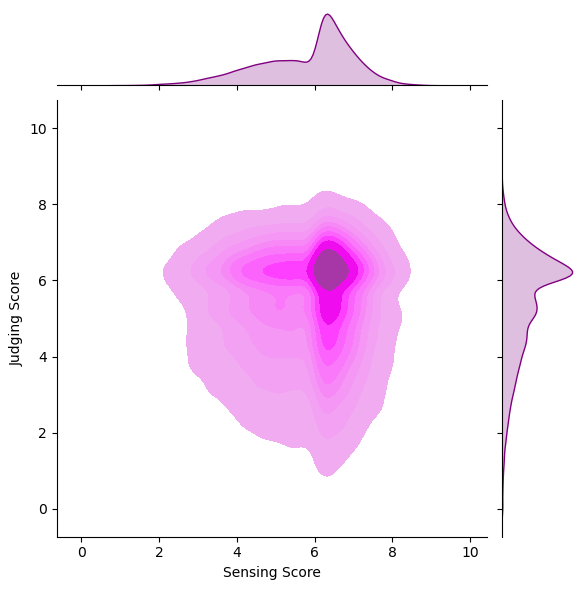

In [20]:
# Joint plot for Sensing vs Judging Score with kde and scatter
sns.jointplot(x='Sensing Score', y='Judging Score', data=data, kind='kde', color='purple', fill=True)
# plt.title('Joint Plot between Sensing and Judging Scores')
plt.show()